In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# AM6020 Assignment 2

## Submission

This assignment must be **your own work**. Remember the Plagarism Policy that you agreed to (near the top of the AM6020 Modules page on Canvas).

Please submit your assignment electronically:
- Save the notebook (*studentID*_A2.ipynb).
- Upload the notebook to the Assignment 2 submission on Canvas.

**If you submit this assignment in late or to the wrong location, a mark of zero will be recorded unless you make a case for mitigation by submitting supporting documentation (e.g. medical certificates) to the School of Mathematical Sciences Office <sms@ucc.ie>.**


*Note: When solving the tasks below, you can look up further methods and functions, not necessarily covered in the AM6020 lectures, but only methods and functions from the standard library or those modules we covered. In other words, for this assignment you should only ever import math, random, NumPy and/or Matplotlib.*

## Part 1: Plotting data (7 marks)

The data file *company_sales_data.csv* contains monthly sales of five different products over one year. It can be downloaded from the Assigment 2 page on Canvas.

Read this data into a numpy array and plot the monthly sales of each product, all on the same axes (i.e. in the one figure). Include a legend to make it easy to see what curve corresponds to what product.

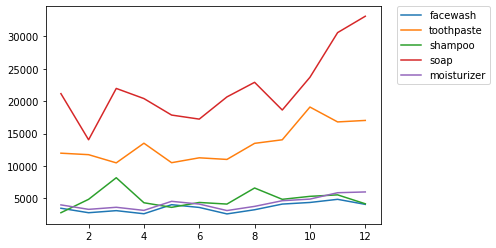

In [103]:
# Write your code here. Insert more cells as needed.
read_data = np.genfromtxt('/Users/jameshhehir/Downloads/company_sales_data.csv', dtype=float, delimiter=",", names=True)
plt.plot(read_data['month_number'],read_data['facewash'], label='facewash')
plt.plot(read_data['month_number'],read_data['toothpaste'], label='toothpaste')
plt.plot(read_data['month_number'],read_data['shampoo'], label='shampoo')
plt.plot(read_data['month_number'],read_data['soap'], label='soap')
plt.plot(read_data['month_number'],read_data['moisturizer'], label='moisturizer')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Plot the total monthly sales; that is, sales of all the products together for *each month*.

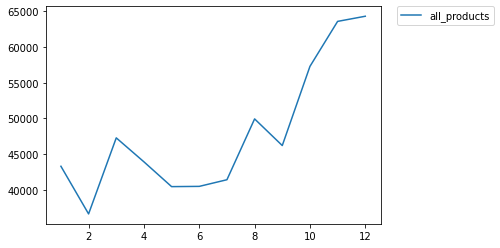

In [206]:
# Write your code here. Insert more cells as needed.
new_data = np.loadtxt("/Users/jameshhehir/Downloads/company_sales_data.csv", delimiter=',', skiprows=1, usecols=range(1,6))
res = [sum(i) for i in new_data]
plt.plot(read_data['month_number'],res, label='all_products')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Now create a pie chart to represent the total sales over the year of *each product*.

How do you make a pie chart? Good question. As we did in Lecture 7, visit the [Matplotlib gallery](http://www.matplotlib.org/gallery.html) and find an example of a simple pie chart (*hint: look for the subheading 'Pie and polar chart'*). Adapt this code for the present data.

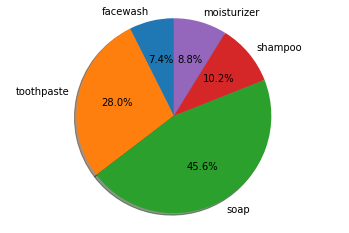

In [167]:
# Write your code here. Insert more cells as needed.
sum_of_prods = [sum(x) for x in zip(*read_data)]
new_sum = np.delete(sum_of_prods, 0)

labels = 'facewash', 'toothpaste', 'soap', 'shampoo', 'moisturizer'



fig1, ax1 = plt.subplots()
ax1.pie(new_sum, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

## Part 2: Classes and dictionaries (5 marks)

Make a class called `Person` to store the below information. Each person has the attributes 'name', 'age', 'height', 'hair' and 'eyes'.
(For comparison, in the Album example of a class in Lecture 11 the *attributes* were 'artist', 'name', 'style', etc.)

| name     | age (years) | height (metres) | hair   | eyes  |
|----------|-----|--------|--------|-------|
| Betty    | 24  | 1.65   | brown  | brown |
| John     | 30  | 1.7    | brown  | brown |
| Samantha | 28  | 1.75   | blonde | green |
| Gerald   | 25  | 1.8    | red    | blue  |

You should also include a method for the Person class called `summary` that returns a string describing the person in one sentence (for example, 'Betty is 24 years old, has brown hair,...').

In [174]:
# Write your code here. Insert more cells as needed.
class Person:
    def __init__(self, name, age, height, hair, eyes):
        self.name = name
        self.age = age
        self.height = height
        self.hair = hair
        self.eyes = eyes
    
    def summary(self):
        return self.name + ' is ' + str(self.age) + ' years old and ' + str(self.height) + ' metres tall with ' + self.hair + ' hair and ' + self.eyes + ' eyes.'


Now create instances of the Person class. Create an object for each person in the table above. Demonstrate the `summary` method.

In [177]:
# Write your code here. Insert more cells as needed.
person1 = Person('Betty',24,1.65,'brown','brown')
person2 = Person('John',30,1.7,'brown','brown')
person3 = Person('Samantha',28,1.75,'blonde','green')
person4 = Person('Gerald',25,1.8,'red','blue')
print(person1.summary())

Betty is 24 years old and 1.65 metres tall with brown hair and brown eyes.


Now, to keep all your people data together, create a dictionary to store all the data in one place. In other words, create a dictionary where the *values* are the Person objects you created.

In [222]:
# Write your code here. Insert more cells as needed.
person = {'p1': person1, 'p2': person2, 'p3': person3, 'p4': person4}
print(person['p1'].summary())
print(person['p2'].summary())
print(person['p3'].summary())
print(person['p4'].summary())

Betty is 24 years old and 1.65 metres tall with brown hair and brown eyes.
John is 30 years old and 1.7 metres tall with brown hair and brown eyes.
Samantha is 28 years old and 1.75 metres tall with blonde hair and green eyes.
Gerald is 25 years old and 1.8 metres tall with red hair and blue eyes.


## Part 3: Blurring images (8 marks)

Write your own code to apply a *mean blur* to an image by kernel convolution. In other words, do not use openCV.

Apply your code to the grayscale image *cactus.jpg* to be downloaded from the Assignment 2 page on Canvas.

To start, only use a $3\times 3$ kernel.

Plot both the original and the blurred image side-by-side. Do you notice much of a difference?

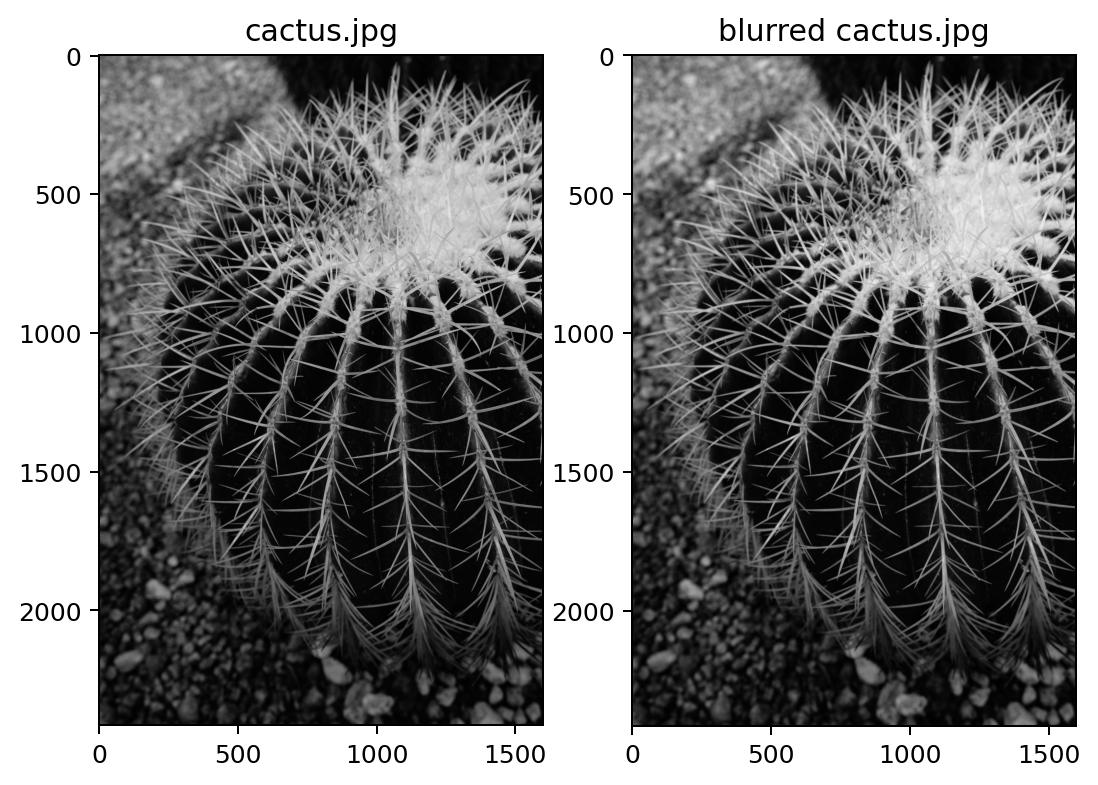

In [6]:
# Write your code here. Insert more cells as needed.

def meankernel():
    return np.array ([
        [1,1,1],
        [1,1,1],
        [1,1,1]
    ])

kernel = meankernel()

def convolution3x3(img, kernel, step_size=1):
    columns = img.shape[1] - kernel.shape[1] + 1
    rows = img.shape[0] - kernel.shape[0] + 1
    outputmatrix = np.zeros((rows,columns))
    
    ki = 0
    kj = 0
    
    for row in range(0,rows,step_size):
        for col in range(0, columns, step_size):
            value = (
                (kernel[ki][kj]*img[row][col]) +
                (kernel[ki][kj+1]*img[row][col+1]) +
                (kernel[ki][kj+2]*img[row][col+2]) +
                (kernel[ki+1][kj]*img[row+1][col]) +
                (kernel[ki+1][kj+1]*img[row+1][col+1]) +
                (kernel[ki+1][kj+2]*img[row+1][col+2]) +
                (kernel[ki+2][kj]*img[row+2][col]) +
                (kernel[ki+2][kj+1]*img[row+2][col+1]) +
                (kernel[ki+2][kj+2]*img[row+2][col+2]) 
            ) // np.sum(kernel)
            
            outputmatrix[row][col] = value
    return outputmatrix

img = mpimg.imread('/Users/jameshhehir/Downloads/cactus.jpg')
blurredimage3x3 = (convolution3x3(img, kernel, step_size=1))

plt.figure(figsize=(7,12), dpi=180)
plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('cactus.jpg')
plt.subplot(2,2,2),plt.imshow(blurredimage3x3,cmap='gray')
plt.title('blurred cactus.jpg')
plt.show()

Now adapt your code for a $n\times n$ kernel. Do you notice a difference for a larger sized kernel? Maybe try a few different sizes.

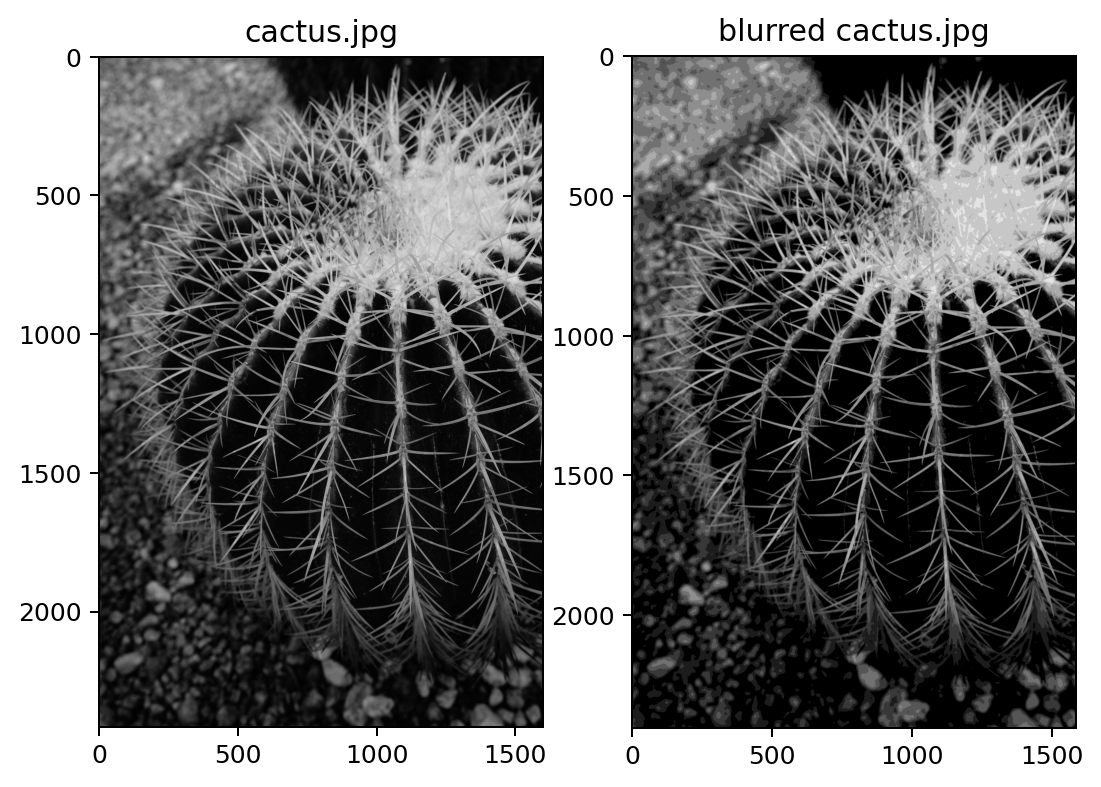

In [17]:
# Write your code here. Insert more cells as needed.
def meankernel(): 
    return np.ones((15,15))

kernel = meankernel()

def convolution15x15(img, kernel, step_size=1):
    columns = img.shape[1] - kernel.shape[1] + 1
    rows = img.shape[0] - kernel.shape[0] + 1
    outputmatrix = np.zeros((rows,columns))
    
    ki = 0
    kj = 0
    
    for row in range(0,rows,step_size):
        for col in range(0, columns, step_size):
            value = (
                (kernel[ki][kj]*img[row][col]) +
                (kernel[ki][kj+1]*img[row][col+1]) +
                (kernel[ki][kj+2]*img[row][col+2]) +
                (kernel[ki+1][kj]*img[row+1][col]) +
                (kernel[ki+1][kj+1]*img[row+1][col+1]) +
                (kernel[ki+1][kj+2]*img[row+1][col+2]) +
                (kernel[ki+2][kj]*img[row+2][col]) +
                (kernel[ki+2][kj+1]*img[row+2][col+1]) +
                (kernel[ki+2][kj+2]*img[row+2][col+2]) 
            ) // np.sum(kernel)
            
            outputmatrix[row][col] = value
    return outputmatrix

img = mpimg.imread('/Users/jameshhehir/Downloads/cactus.jpg')
blurredimage15x15 = (convolution15x15(img, kernel, step_size=1))

plt.figure(figsize=(7,12), dpi=180)
plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('cactus.jpg')
plt.subplot(2,2,2),plt.imshow(blurredimage15x15,cmap='gray')
plt.title('blurred cactus.jpg')
plt.show()

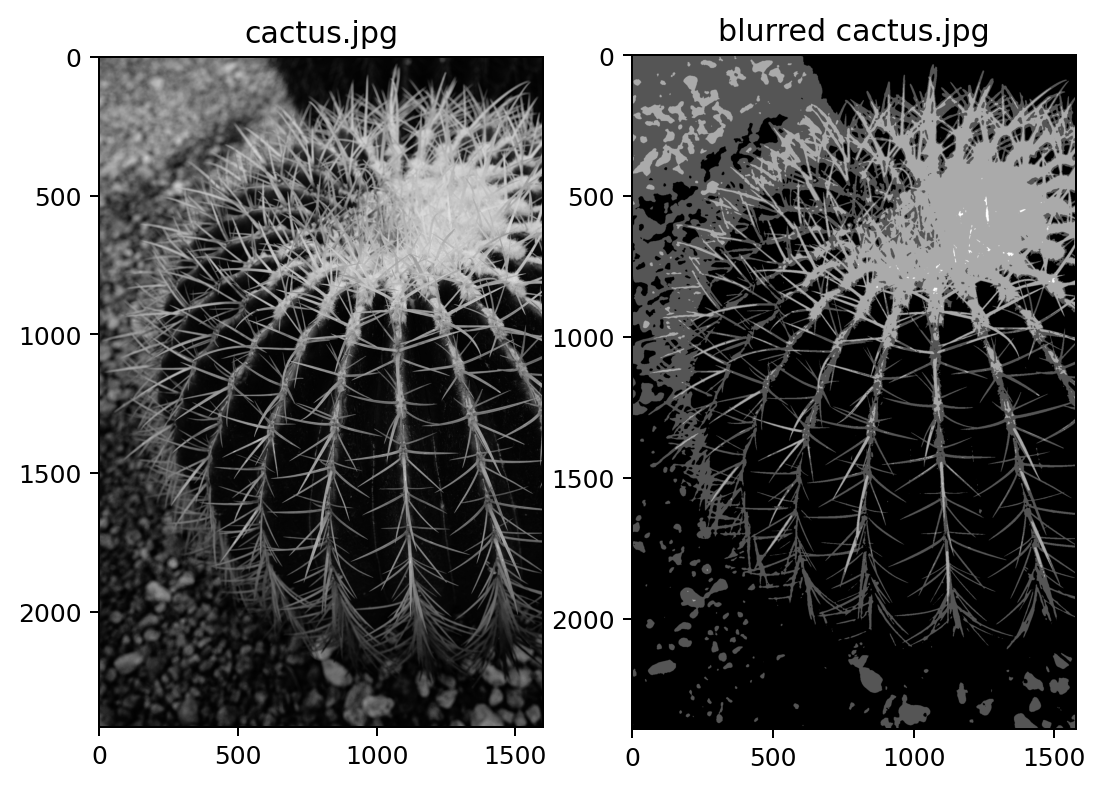

In [18]:
# Write your code here. Insert more cells as needed.
def meankernel(): 
    return np.ones((25,25))

kernel = meankernel()

def convolution25x25(img, kernel, step_size=1):
    columns = img.shape[1] - kernel.shape[1] + 1
    rows = img.shape[0] - kernel.shape[0] + 1
    outputmatrix = np.zeros((rows,columns))
    
    ki = 0
    kj = 0
    
    for row in range(0,rows,step_size):
        for col in range(0, columns, step_size):
            value = (
                (kernel[ki][kj]*img[row][col]) +
                (kernel[ki][kj+1]*img[row][col+1]) +
                (kernel[ki][kj+2]*img[row][col+2]) +
                (kernel[ki+1][kj]*img[row+1][col]) +
                (kernel[ki+1][kj+1]*img[row+1][col+1]) +
                (kernel[ki+1][kj+2]*img[row+1][col+2]) +
                (kernel[ki+2][kj]*img[row+2][col]) +
                (kernel[ki+2][kj+1]*img[row+2][col+1]) +
                (kernel[ki+2][kj+2]*img[row+2][col+2]) 
            ) // np.sum(kernel)
            
            outputmatrix[row][col] = value
    return outputmatrix

img = mpimg.imread('/Users/jameshhehir/Downloads/cactus.jpg')
blurredimage25x25 = (convolution25x25(img, kernel, step_size=1))

plt.figure(figsize=(7,12), dpi=180)
plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('cactus.jpg')
plt.subplot(2,2,2),plt.imshow(blurredimage25x25,cmap='gray')
plt.title('blurred cactus.jpg')
plt.show()

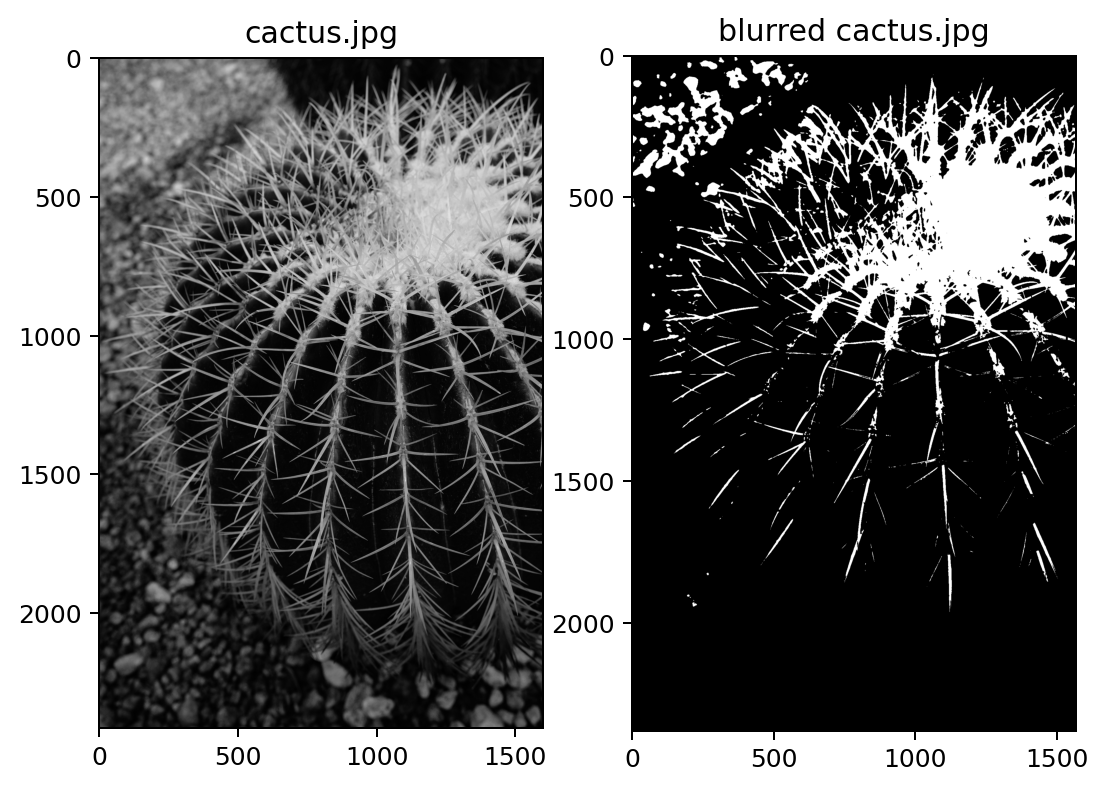

In [20]:
# Write your code here. Insert more cells as needed.
def meankernel(): 
    return np.ones((35,35))

kernel = meankernel()

def convolution35x35(img, kernel, step_size=1):
    columns = img.shape[1] - kernel.shape[1] + 1
    rows = img.shape[0] - kernel.shape[0] + 1
    outputmatrix = np.zeros((rows,columns))
    
    ki = 0
    kj = 0
    
    for row in range(0,rows,step_size):
        for col in range(0, columns, step_size):
            value = (
                (kernel[ki][kj]*img[row][col]) +
                (kernel[ki][kj+1]*img[row][col+1]) +
                (kernel[ki][kj+2]*img[row][col+2]) +
                (kernel[ki+1][kj]*img[row+1][col]) +
                (kernel[ki+1][kj+1]*img[row+1][col+1]) +
                (kernel[ki+1][kj+2]*img[row+1][col+2]) +
                (kernel[ki+2][kj]*img[row+2][col]) +
                (kernel[ki+2][kj+1]*img[row+2][col+1]) +
                (kernel[ki+2][kj+2]*img[row+2][col+2]) 
            ) // np.sum(kernel)
            
            outputmatrix[row][col] = value
    return outputmatrix

img = mpimg.imread('/Users/jameshhehir/Downloads/cactus.jpg')
blurredimage35x35 = (convolution35x35(img, kernel, step_size=1))

plt.figure(figsize=(7,12), dpi=180)
plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('cactus.jpg')
plt.subplot(2,2,2),plt.imshow(blurredimage35x35,cmap='gray')
plt.title('blurred cactus.jpg')
plt.show()